In [1]:
import numpy as np
from test import test
from util import exponential_decay, inverse_decay, tanh_decay
import matplotlib.pyplot as plt
import visualize
from stats import *

In [2]:
topics = np.array([[-1, 1]])

In [3]:
varied_param = 'influencer_attention_bound'
varied_param_legend_label = 'Attention Bound'
varied_param_x_label = 'Influencer Attention Bound'

In [4]:
num_influencers = 1
num_agents = 8

attention_bounds = list(np.linspace(100, 1000, 10))

varied_param_values = attention_bounds

In [5]:
perfect_info_stats, imperfect_info_stats = test(
    topics=topics,
    varied_param=varied_param,
    num_influencers=num_influencers,
    num_agents=num_agents,
    producer_topic_interest_func=lambda x: inverse_decay(x, 0.1, 2),
    consumer_topic_interest_func=lambda x: inverse_decay(x, 0.1, 2),
    consumer_attention_bound=50,
    consumer_external_interest_prob=3,
    consumer_delay_sensitivity=1,
    influencer_attention_bound=attention_bounds,
    influencer_delay_sensitivity=1,
    init_following_rates_method='equal',
    init_interest_method='even',
    production_rate=1,
    external_production_rate=1,
    use_imperfect_information=True,
)

Optimizing consumer 0
Optimizing consumer 1
Optimizing consumer 2
Optimizing consumer 3
Optimizing consumer 4
Optimizing consumer 5
Optimizing consumer 6
Optimizing consumer 7
Optimizing influencer 8
Optimizing producer 0
Optimization succeeded (overall 0.003161000000545755s): nit=3, nfev=12, njev=6.
Optimizing producer 1
Optimization succeeded (overall 0.00247687500086613s): nit=3, nfev=10, njev=5.
Optimizing producer 2
Optimization succeeded (overall 0.001986000017495826s): nit=2, nfev=8, njev=4.
Optimizing producer 3
Optimization succeeded (overall 0.0035849999985657632s): nit=4, nfev=14, njev=7.
Optimizing producer 4
Optimization succeeded (overall 0.0036328340065665543s): nit=4, nfev=14, njev=7.
Optimizing producer 5
Optimization succeeded (overall 0.0020187920017633587s): nit=2, nfev=8, njev=4.
Optimizing producer 6
Optimization succeeded (overall 0.002477457979694009s): nit=3, nfev=10, njev=5.
Optimizing producer 7
Optimization succeeded (overall 0.0028899999742861837s): nit=3, 

In [28]:
import importlib
importlib.reload(visualize)

<module 'visualize' from '/Users/gabeguralnick/git/content-market-experiment/visualize.py'>

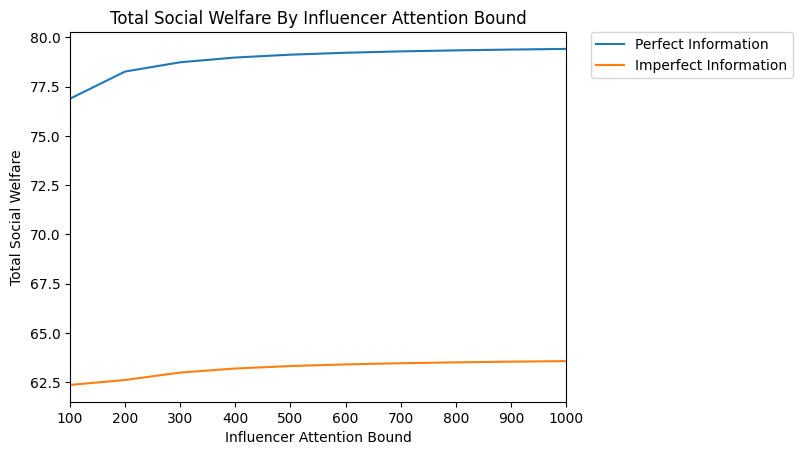

In [7]:
visualize.plot_ending_value_by_test(f"Total Social Welfare By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'total_social_welfare', varied_param_values, varied_param_x_label, 'Total Social Welfare')

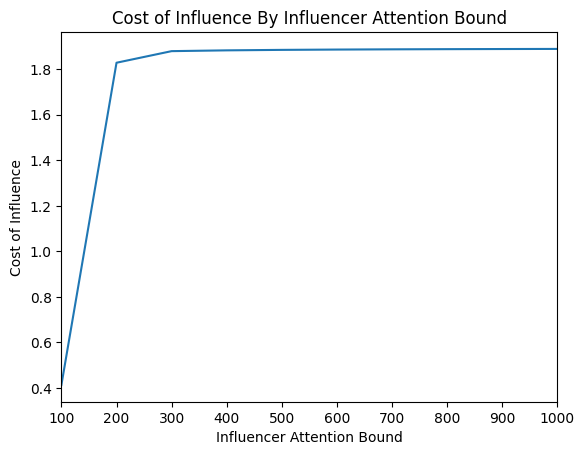

In [29]:
visualize.plot_cost_of_influence_by_test(f"Cost of Influence By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, varied_param_values, varied_param_x_label, 'Cost of Influence')

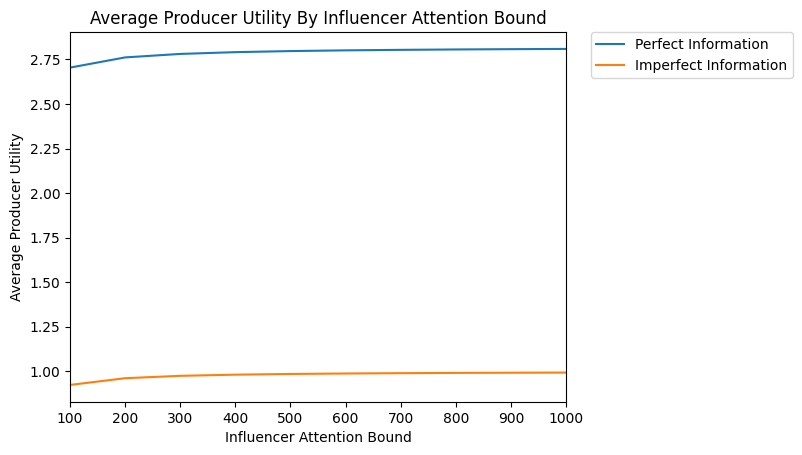

In [12]:
visualize.plot_ending_value_by_test(f"Average Producer Utility By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_producer_utility', varied_param_values, varied_param_x_label, 'Average Producer Utility')

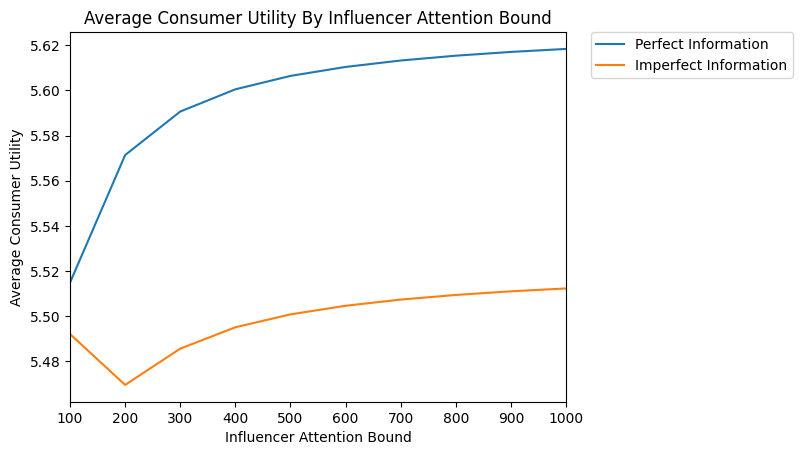

In [13]:
visualize.plot_ending_value_by_test(f"Average Consumer Utility By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_consumer_utility', varied_param_values, varied_param_x_label, 'Average Consumer Utility')

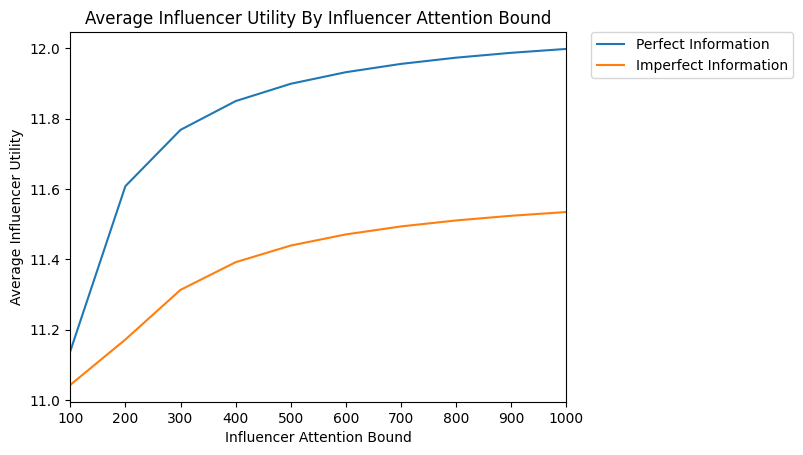

In [14]:
visualize.plot_ending_value_by_test(f"Average Influencer Utility By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_influencer_utility', varied_param_values, varied_param_x_label, 'Average Influencer Utility')

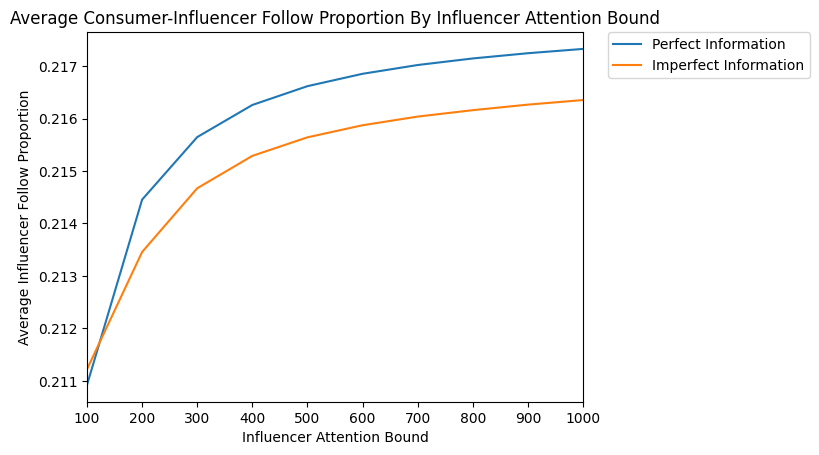

In [15]:
visualize.plot_ending_value_by_test(f"Average Consumer-Influencer Follow Proportion By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_influencer_follow_proportion', varied_param_values, varied_param_x_label, 'Average Influencer Follow Proportion')

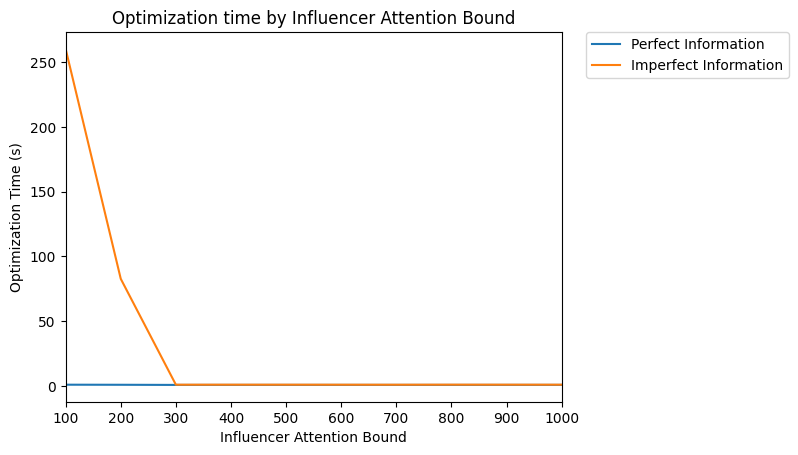

In [16]:
visualize.plot_value_by_test(f"Optimization time by {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'optimization_time', varied_param_values, varied_param_x_label, 'Optimization Time (s)')

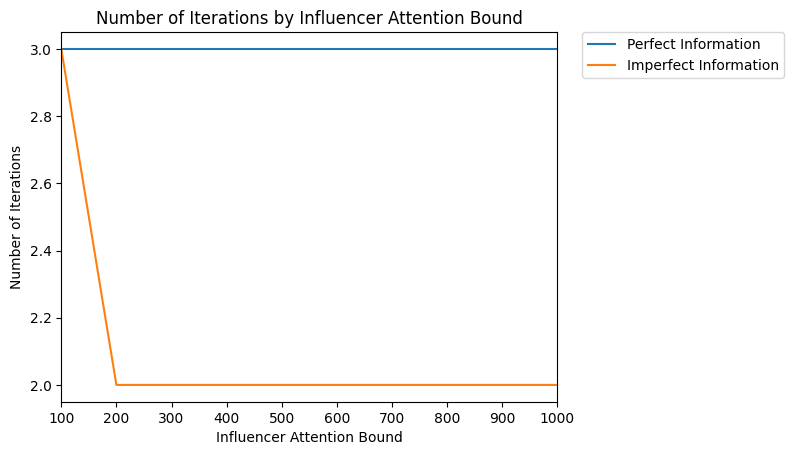

In [17]:
visualize.plot_value_by_test(f"Number of Iterations by {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'num_iterations', varied_param_values, varied_param_x_label, 'Number of Iterations')

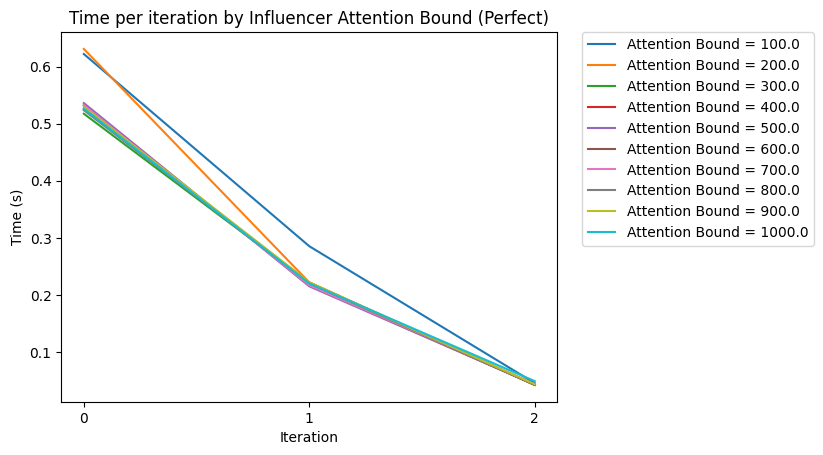

In [18]:
visualize.plot_value_by_iteration_by_test(f"Time per iteration by {varied_param_x_label} (Perfect)", perfect_info_stats, 'optimization_times', varied_param_legend_label, varied_param_values, 'Time (s)')

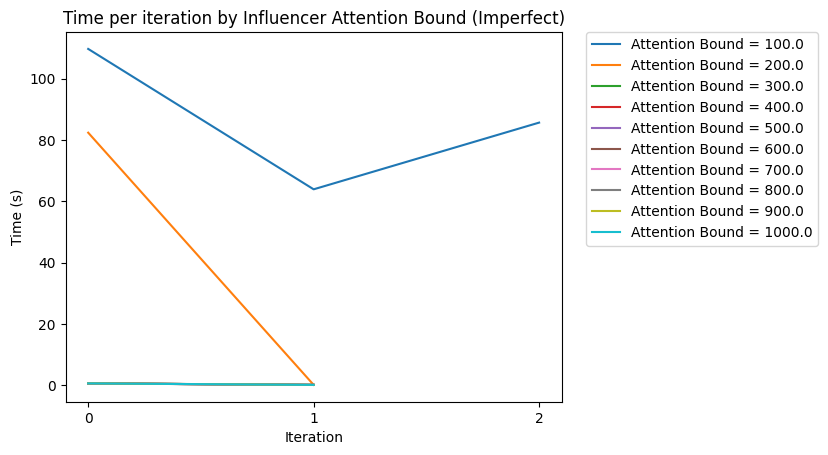

In [19]:
visualize.plot_value_by_iteration_by_test(f"Time per iteration by {varied_param_x_label} (Imperfect)", imperfect_info_stats, 'optimization_times', varied_param_legend_label, varied_param_values, 'Time (s)')

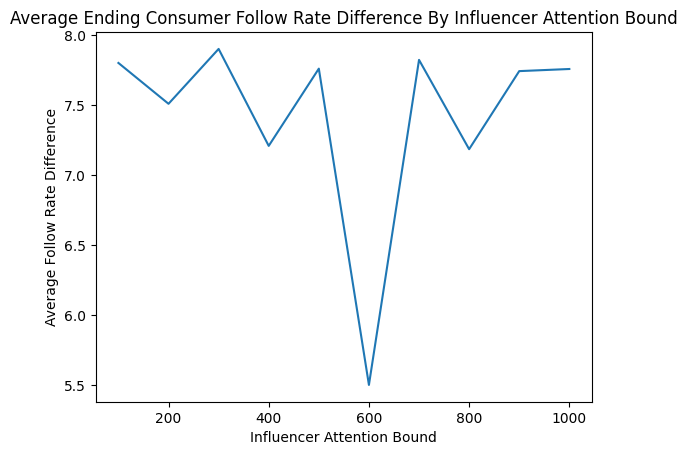

In [20]:
avg_follow_rate_diffs = []

for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    imperfect_stat: TestStats = imperfect_info_stats[i]

    avg_follow_rate_diff = 0

    for index in perfect_stat.consumer_stats:
        perfect_consumer_stat = perfect_stat.consumer_stats[index]
        imperfect_consumer_stat = imperfect_stat.consumer_stats[index]

        ending_follow_rate_diff = np.linalg.norm(perfect_consumer_stat.following_rates[-1] - imperfect_consumer_stat.following_rates[-1])
        avg_follow_rate_diff += ending_follow_rate_diff
    
    avg_follow_rate_diff /= len(perfect_stat.consumer_stats)
    avg_follow_rate_diffs.append(avg_follow_rate_diff)

plt.figure()
plt.title(f"Average Ending Consumer Follow Rate Difference By {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Average Follow Rate Difference")
plt.plot(varied_param_values, avg_follow_rate_diffs)
plt.show()

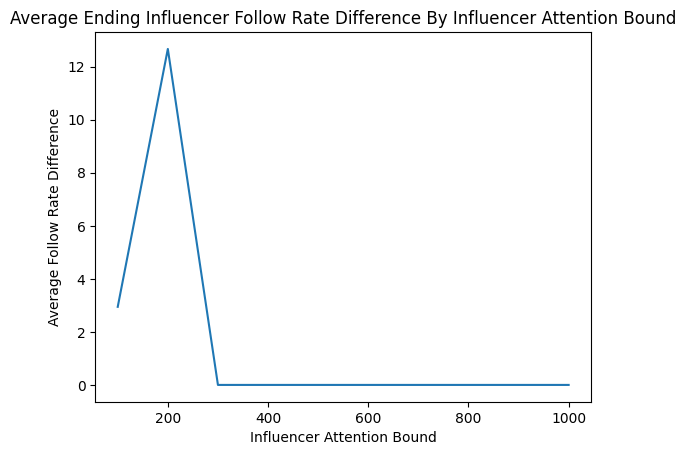

In [21]:
avg_follow_rate_diffs = []

for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    imperfect_stat: TestStats = imperfect_info_stats[i]

    avg_follow_rate_diff = 0

    for index in perfect_stat.influencer_stats:
        perfect_influencer_stat = perfect_stat.influencer_stats[index]
        imperfect_influencer_stat = imperfect_stat.influencer_stats[index]

        ending_follow_rate_diff = np.linalg.norm(perfect_influencer_stat.following_rates[-1] - imperfect_influencer_stat.following_rates[-1])
        avg_follow_rate_diff += ending_follow_rate_diff
    
    avg_follow_rate_diff /= len(perfect_stat.influencer_stats)
    avg_follow_rate_diffs.append(avg_follow_rate_diff)

plt.figure()
plt.title(f"Average Ending Influencer Follow Rate Difference By {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Average Follow Rate Difference")
plt.plot(varied_param_values, avg_follow_rate_diffs)
plt.show()

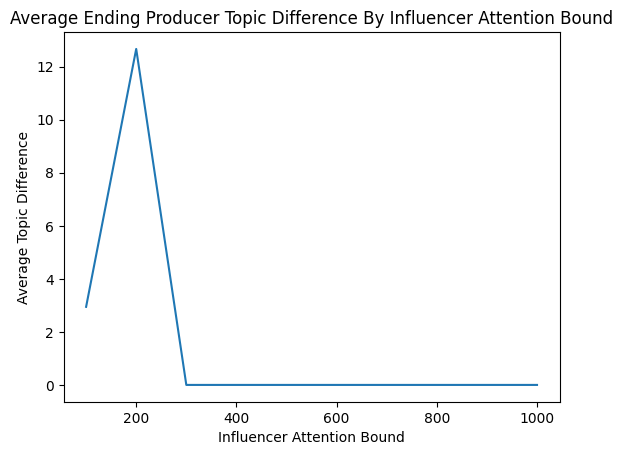

In [22]:
avg_topic_diffs = []

for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    imperfect_stat: TestStats = imperfect_info_stats[i]

    avg_topic_diff = 0

    for index in perfect_stat.producer_stats:
        perfect_producer_stat = perfect_stat.producer_stats[index]
        imperfect_producer_stat = imperfect_stat.producer_stats[index]

        ending_topic_diff = np.linalg.norm(perfect_producer_stat.topics[-1] - imperfect_producer_stat.topics[-1])
        avg_topic_diff += ending_topic_diff
    
    avg_topic_diff /= len(perfect_stat.producer_stats)
    avg_topic_diffs.append(avg_topic_diff)

plt.figure()
plt.title(f"Average Ending Producer Topic Difference By {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Average Topic Difference")
plt.plot(varied_param_values, avg_follow_rate_diffs)
plt.show()

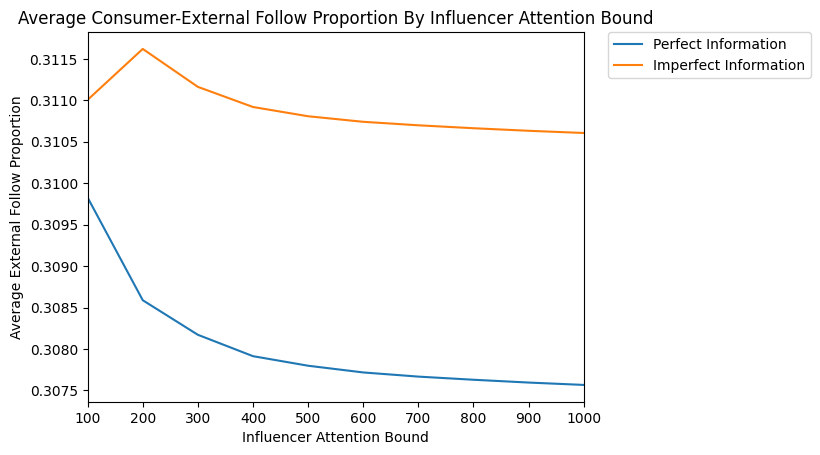

In [23]:
visualize.plot_ending_value_by_test(f"Average Consumer-External Follow Proportion By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_external_follow_proportion', varied_param_values, varied_param_x_label, 'Average External Follow Proportion')

In [24]:
for stat in perfect_info_stats:
    print(stat.to_dict())

{'num_iterations': 3, 'total_consumer_utility': [0, 44.11044395708164, 44.118606579774045, 44.118643542513404], 'total_producer_utility': [0, 21.609261739407007, 21.633857742363155, 21.63389470510252], 'total_influencer_utility': [0, 11.131365995164638, 11.138424065639004, 11.138620008725074], 'total_social_welfare': [0, 76.85107169165329, 76.8908883877762, 76.89115825634099], 'average_consumer_rate_change': [0, 13.561806984871374, 0.6135869134619436, 0.0], 'average_producer_topic_change': [0, 0.056342925389366555, 0.002634494419323702, 0.00039174755916715487], 'average_influencer_rate_change': [0, 3.8329395339923837, 1.2550280317349722, 0.0], 'average_consumer_utility_change': [0, 5.513805494635205, 0.0010203278365505941, 4.6203424197699405e-06], 'average_producer_utility_change': [0, 2.701157717425876, 0.003074500369518729, 4.620342420269541e-06], 'average_influencer_utility_change': [0, 11.131365995164638, 0.007058070474366573, 0.00019594308606940558], 'consumer_stats': {0: {'utilit

In [25]:
for stat in imperfect_info_stats:
    print(stat.to_dict())

{'num_iterations': 3, 'total_consumer_utility': [0, 43.67857957282593, 43.93411740375721, 43.93622291308576], 'total_producer_utility': [0, 7.379785756975508, 7.380993723353134, 7.380993723353134], 'total_influencer_utility': [0, 10.905434133172164, 11.038803022810978, 11.042637492989895], 'total_social_welfare': [0, 61.963799462973604, 62.35391414992132, 62.35985412942879], 'average_consumer_rate_change': [0, 13.561875849753672, 0.22247250881651676, 0.20334507189258888], 'average_producer_topic_change': [0, 0.014433841152583803, 0.018649532450632066, 0.000545536002148999], 'average_influencer_rate_change': [0, 3.833045108925298, 0.6553457795956119, 0.6333936924771689], 'average_consumer_utility_change': [0, 5.4598224466032415, 0.03194222886641063, 0.0002631886660678928], 'average_producer_utility_change': [0, 0.9224732196219385, 0.0001509957972032211, 0.0], 'average_influencer_utility_change': [0, 10.905434133172164, 0.13336888963881322, 0.0038344701789174707], 'consumer_stats': {0: {